## 917719C094   Shekinah Olive

In [1]:
import pandas as pd

## 2. Load Dataset

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Visualizations

Univariate Analysis

In [4]:
df['Age'].mean()

38.9218

In [5]:
df['Age'].median()

37.0

In [6]:
df['Age'].mode()

0    37
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Shekinah Olive\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Shekinah Olive\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shekinah Olive\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


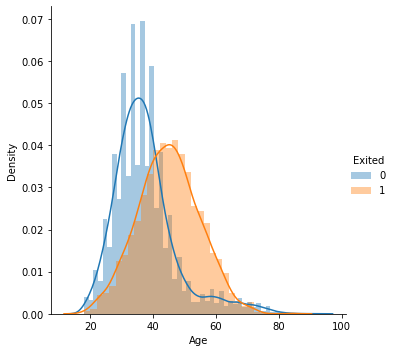

In [8]:
sns.FacetGrid(df, hue = "Exited", size=5).map(sns.distplot, 'Age').add_legend()

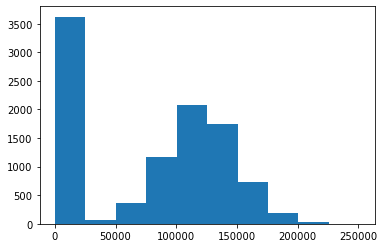

In [9]:
plt.hist(df['Balance'])
plt.show()

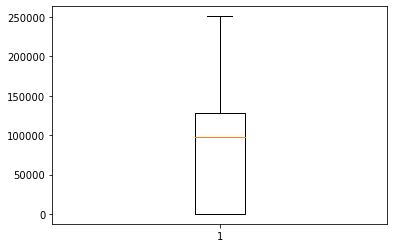

In [10]:
plt.boxplot(df['Balance'])
plt.show()

-------------------

Bivariate Analysis

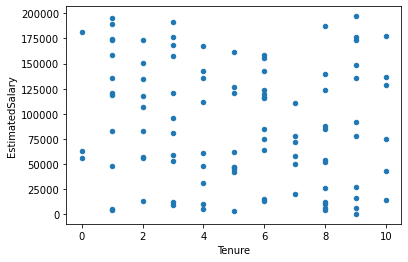

In [11]:
df.sample(100).plot.scatter(x='Tenure',y='EstimatedSalary')
plt.show()

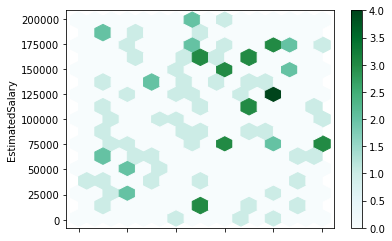

In [12]:
df.sample(100).plot.hexbin(x='Tenure',y='EstimatedSalary',gridsize=15)
plt.show()

-----------------------

Multivariate Analysis

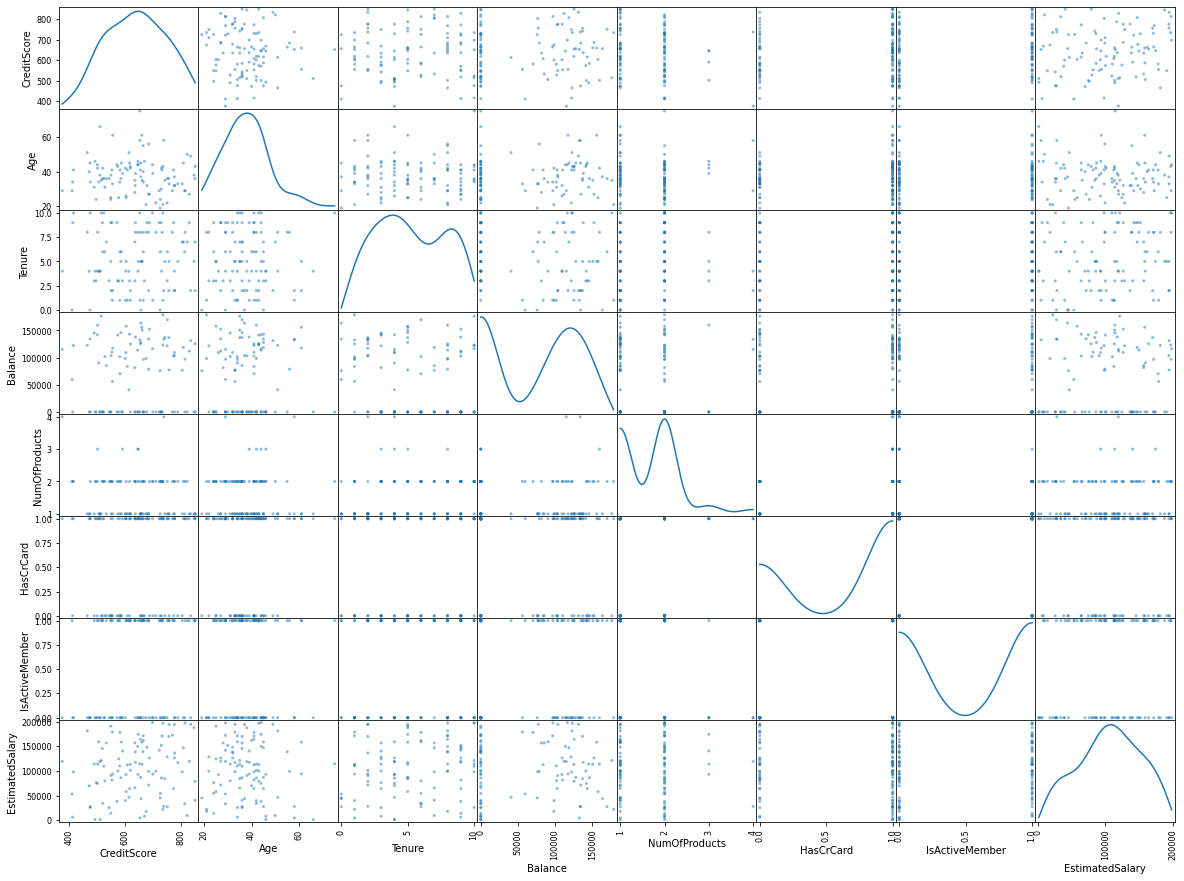

In [13]:
pd.plotting.scatter_matrix(df.loc[:100,'CreditScore':'EstimatedSalary'], diagonal="kde", figsize=(20,15))
plt.show()

----

## 4. Describe

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## 5. Handle missing values

In [15]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

No missing values are present in the dataset

-----------

## 6. Find outliers and replace them using IQR

C:\Users\Shekinah Olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

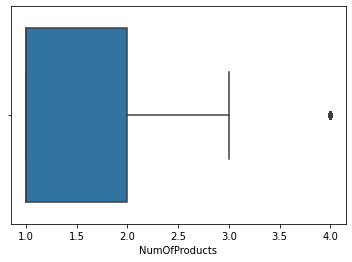

In [16]:
sns.boxplot(df.NumOfProducts)

In [17]:
Q1 = df.NumOfProducts.quantile(0.25)
Q3 = df.NumOfProducts.quantile(0.75)

IQR = Q3 - Q1
upperLimit = Q3 + 1.5 * IQR
lowerLimit = Q1 - 1.5 * IQR

df = df[df.NumOfProducts < upperLimit]

C:\Users\Shekinah Olive\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NumOfProducts'>

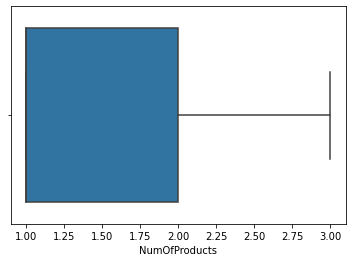

In [18]:
sns.boxplot(df.NumOfProducts)

--------

## 7. Check for Categorical columns and perform Encoding

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Geography = le.fit_transform(df.Geography)
df.head()

C:\Users\Shekinah Olive\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0


One Hot Encoding

In [21]:
df_main = pd.get_dummies(df,columns = ['Gender'])
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,Hill,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,5,15737888,Mitchell,850,2,43,2,125510.82,1,1,1,79084.10,0,1,0


-----

## 8. Split data into dependent and independent variables

In [22]:
#Independent variable X
X = df_main.drop(columns = ['Exited','Surname'], axis = 1)
X.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,608,2,41,1,83807.86,1,0,1,112542.58,1,0
2,3,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,699,0,39,1,0.00,2,0,0,93826.63,1,0
4,5,15737888,850,2,43,2,125510.82,1,1,1,79084.10,1,0


In [23]:
#Dependent variable Y
Y = df_main.Exited
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

-------

## 9. Scale the independent variables

In [24]:
from sklearn.preprocessing import scale
X_scaled = pd.DataFrame(scale(X), columns = X.columns)
X_scaled.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
0,-1.730861,-0.784231,-0.326110,-0.901890,0.297483,-1.041259,-1.223855,-0.935677,0.645884,0.969870,0.022376,1.098379,-1.098379
1,-1.730515,-0.607593,-0.439952,1.512868,0.202106,-1.387070,0.118987,-0.935677,-1.548267,0.969870,0.217018,1.098379,-1.098379
2,-1.730169,-0.996853,-1.536977,-0.901890,0.297483,1.033605,1.334368,2.695964,0.645884,-1.031066,0.241171,1.098379,-1.098379
3,-1.729823,0.143532,0.501833,-0.901890,0.011351,-1.387070,-1.223855,0.880143,-1.548267,-1.031066,-0.108424,1.098379,-1.098379
4,-1.729476,0.651305,2.064576,1.512868,0.392860,-1.041259,0.787188,-0.935677,0.645884,0.969870,-0.364775,1.098379,-1.098379


----

## 10. Train test split

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 0)
X_train.head()

,RowNumber,CustomerId,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male
5833,0.301456,0.603674,-0.916020,0.305489,-0.751667,-1.041259,0.582053,-0.935677,-1.548267,0.969870,1.500772,-0.910432,0.910432
9935,1.730207,-1.178578,1.246982,-0.901890,0.011351,-0.003827,-1.223855,0.880143,0.645884,-1.031066,-0.065927,-0.910432,0.910432
863,-1.431329,-0.056206,0.284498,0.305489,-1.323931,1.725226,0.009395,0.880143,-1.548267,0.969870,0.546689,1.098379,-1.098379
8866,1.357263,-1.559984,-0.098426,-0.901890,1.251256,-0.349638,-1.223855,-0.935677,0.645884,-1.031066,-0.158192,1.098379,-1.098379
3761,-0.421923,-0.079736,-0.574493,0.305489,0.678992,-0.003827,1.057170,0.880143,0.645884,-1.031066,-0.897954,-0.910432,0.910432


In [26]:
X_train.shape

(6958, 13)

In [27]:
Y_train.shape

(6958,)